# Selenium to Extract from Crypto Market Cap

## first we import the lybraris that will have in use:

this imports are not all the libraries that we will be using but are the required ones to use selenium for the extraction that we are looking for.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import numpy as np
import re as re
import time
import pandas as pd
import os
from pymongo import MongoClient
from dotenv import load_dotenv
from selenium.webdriver.chrome.options import Options

## Setting the enviroment to use selenium and import info

for the project ill be extracting the list of all crypto currencies from the we page listed in the URL

In [2]:
url = "https://coinmarketcap.com/?page=2"

In [3]:
# we need web page number of page to be added in the url by using the parameter for the url "/?page=3"

The following code will allow to set up the browser so that selenium can run and load a page:

In [4]:
options = Options()
options.add_argument('--window-size=2560,1440') # will asigne size of browser screen
options.add_argument('--disable-gpu') # use the GPU resources 
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),
                          options = options) # this will launch the browser. 

In [5]:
driver.get(url)
time.sleep(4)

the following code slowly scrolls through a web page allowing for the content to load and ensure the extraction of all the available information by page:

In [6]:
current_scroll_position, new_height= 0, 1
while current_scroll_position <= new_height:
    current_scroll_position += 8
    driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
    new_height = driver.execute_script("return document.body.scrollHeight")
    
html = driver.execute_script("return document.body.outerHTML;")

In [7]:
html

'<body data-commit="01403c3f" data-commit-time="2022-08-26T10:37:40+00:00" class="DAY"><div id="__next" data-reactroot=""><div class="bywovg-1 sXmSU"><div class="main-content"><div class="bywovg-0 kuGegY"><div><div class="xgse3a-0 jZMHSJ cmc-header-desktop"><div class="wpt4tp-0 dbNnXg"><div class="container"><div class="wpt4tp-1 fvEeHg global-stats"><span class="sc-19xuzw1-0 bOVkgr">Cryptos: &nbsp;<a href="/" class="cmc-link">20,753</a></span><span class="sc-19xuzw1-0 bOVkgr">Exchanges: &nbsp;<a href="/rankings/exchanges/" class="cmc-link">523</a></span><span class="sc-19xuzw1-0 bOVkgr">Market Cap: &nbsp;<a href="/charts/" class="cmc-link">$1,005,058,808,265.252</a></span><span class="sc-19xuzw1-0 bOVkgr">24h Vol: &nbsp;<a href="/charts/" class="cmc-link">$81,065,496,054.68</a></span><span class="sc-19xuzw1-0 bOVkgr">Dominance: &nbsp;<a href="/charts/#dominance-percentage" class="cmc-link">BTC: 39.6%&nbsp;ETH: 19.5%</a></span><span class="sc-19xuzw1-0 bOVkgr"><span class="icon-Gas-Fill

## ELT

Now that we have a HTML file we can use this information and starget specific information so that we can use it to make a data frame with all the cryptos in the market.

In [8]:
soup = BeautifulSoup(html,"html.parser")

###  Extracting the name of the crypto

In [16]:
feed = soup.find_all("p",{"class":"sc-1eb5slv-0 iworPT"})

In [17]:
len(feed)

106

In [18]:
feed[0].text

'PancakeSwap'

In [19]:
cryplist = []
for i in range (6,len(feed)):
        temp = feed[i].text
        cryplist.append(temp)

In [20]:
print(cryplist)

['Theta Fuel', 'Oasis Network', 'Ravencoin', 'Kadena', 'Gemini Dollar', 'IoTeX', 'Kyber Network Crystal v2', 'Amp', 'Livepeer', 'BORA', 'Balancer', 'OMG Network', 'Optimism', 'TerraClassicUSD', 'Celsius', '0x', 'Symbol', 'Harmony', 'Ethereum Name Service', 'ICON', 'JUST', 'Golem', 'Reserve Rights', 'IOST', 'Audius', 'Hive', 'Storj', 'Flux', 'Ontology', 'WAX', 'Serum', 'Siacoin', 'Horizen', 'Moonbeam', 'Secret', 'Immutable X', 'ABBC Coin', 'UMA', 'Braintrust', 'SXP', 'Chia', 'MXC', 'Bitcoin Standard Hashrate Token', 'SKALE Network', 'WOO Network', 'Polymath', 'Smooth Love Potion', 'SwissBorg', 'Casper', 'DigiByte', 'Dogelon Mars', 'DAO Maker', 'APENFT', 'PlayDapp', 'CEEK VR', 'Civic', 'SushiSwap', 'Spell Token', 'Voyager Token', 'Pundi X (New)', 'Keep Network', 'Lisk', 'Nervos Network', 'Render Token', 'MediBloc', 'Celer Network', 'Ellipsis', 'Energy Web Token', 'Ren', 'Nano', 'WINkLink', 'Injective', 'Conflux', 'NuCypher', 'Request', 'Ontology Gas', 'ConstitutionDAO', 'Orbs', 'dYdX', '

In [21]:
len(cryplist)

100

###  Extracting the Supply for every Crypto

In [22]:
supply= soup.find_all("p",{"class":"sc-1eb5slv-0 kZlTnE"})

In [23]:
len(supply)

100

In [24]:
supply[0].text

'5,301,214,400 TFUEL'

In [25]:
suplist=[]
for e in range (0,len(supply)):
    temp = supply[e].text
    suplist.append(temp)

In [27]:
print(suplist)

['5,301,214,400 TFUEL', '5,027,383,223 ROSE', '10,473,290,000 RVN', '197,986,762 KDA', '318,240,045 GUSD', '9,540,779,324 IOTX', '177,809,350 KNC', '42,227,702,186 AMP', '24,487,538 LPT', '927,500,000 BORA', '43,115,645 BAL', '140,245,398 OMG', '234,748,364 OP', '9,815,492,200 USTC', '238,863,520 CEL', '847,496,055 ZRX', '5,582,460,005 XYM', '12,439,633,430 ONE', '20,244,862 ENS', '919,483,096 ICX', '8,902,080,000 JST', '1,000,000,000 GLM', '42,302,323,974 RSR', '18,588,745,668 IOST', '818,441,374 AUDIO', '434,638,910 HIVE', '409,514,778 STORJ', '258,142,426 FLUX', '875,249,524 ONT', '2,132,391,668 WAXP', '263,244,669 SRM', '51,784,462,992 SC', '12,753,094 ZEN', '360,870,145 GLMR', '163,295,557 SCRT', '235,284,001 IMX', '1,009,277,022 ABBC', '68,715,405 UMA', '91,803,328 BTRST', '495,442,521 SXP', '4,908,256 XCH', '2,642,132,372 MXC', '12,201,404 BTCST', '3,676,102,671 SKL', '1,145,741,585 WOO', '924,998,413 POLY', '43,322,775,281 SLP', '1,000,000,000 CHSB', '5,738,068,663 CSPR', '15,5

In [26]:
len(suplist)

100

###  Extracting the TAG for every Crypto

In [28]:
coin =soup.find_all("p",{"class":"sc-1eb5slv-0 gGIpIK coin-item-symbol"})

In [29]:
len(coin)

106

In [30]:
coin[1].text

''

In [31]:
coinlist = []
for i in range (6,len(coin)):
        temp = coin[i].text
        coinlist.append(temp)

In [32]:
print(coinlist)

['TFUEL', 'ROSE', 'RVN', 'KDA', 'GUSD', 'IOTX', 'KNC', 'AMP', 'LPT', 'BORA', 'BAL', 'OMG', 'OP', 'USTC', 'CEL', 'ZRX', 'XYM', 'ONE', 'ENS', 'ICX', 'JST', 'GLM', 'RSR', 'IOST', 'AUDIO', 'HIVE', 'STORJ', 'FLUX', 'ONT', 'WAXP', 'SRM', 'SC', 'ZEN', 'GLMR', 'SCRT', 'IMX', 'ABBC', 'UMA', 'BTRST', 'SXP', 'XCH', 'MXC', 'BTCST', 'SKL', 'WOO', 'POLY', 'SLP', 'CHSB', 'CSPR', 'DGB', 'ELON', 'DAO', 'NFT', 'PLA', 'CEEK', 'CVC', 'SUSHI', 'SPELL', 'VGX', 'PUNDIX', 'KEEP', 'LSK', 'CKB', 'RNDR', 'MED', 'CELR', 'EPS', 'EWT', 'REN', 'XNO', 'WIN', 'INJ', 'CFX', 'NU', 'REQ', 'ONG', 'PEOPLE', 'ORBS', 'DYDX', 'FX', 'RLY', 'UOS', 'ARDR', 'TRIBE', 'NMR', 'POWR', 'MX', 'RLC', 'SNT', 'COTI', 'VLX', 'XYO', 'CHR', 'ACA', 'PROM', 'API3', 'FXS', 'TEL', 'DENT', 'OCEAN']


In [33]:
len(coinlist)

100

###  Extracting the Market Capital for every Crypto

In [34]:
mcap =soup.find_all("p",{"class":"sc-1eb5slv-0 hykWbK"})


In [35]:
len(mcap)

102

In [36]:
mcap[1].text

'$339.31M$339,313,697'

In [37]:
mcaplist = []
for i in range (1,len(mcap)-1):
        temp = mcap[i].text
        mcaplist.append(temp)

In [39]:
print(mcaplist)

['$339.31M$339,313,697', '$331.51M$331,513,453', '$325.95M$325,950,362', '$319.13M$319,134,201', '$313.02M$313,021,076', '$311.78M$311,782,064', '$307.56M$307,562,994', '$287.57M$287,566,834', '$278.38M$278,384,895', '$275.66M$275,657,893', '$264.43M$264,425,150', '$263.45M$263,448,603', '$261.74M$261,741,260', '$261.08M$261,075,885', '$259.98M$259,982,727', '$258.41M$258,410,387', '$257.24M$257,240,814', '$256.94M$256,937,766', '$256.82M$256,823,876', '$256.49M$256,492,797', '$253.19M$253,186,451', '$249.92M$249,920,345', '$247.25M$247,250,572', '$245.59M$245,591,519', '$244.80M$244,798,599', '$240.13M$240,131,747', '$236.95M$236,945,697', '$232.79M$232,793,683', '$218.46M$218,464,529', '$216.16M$216,158,753', '$213.47M$213,468,671', '$209.78M$209,780,378', '$207.59M$207,586,047', '$204.20M$204,202,326', '$199.01M$199,008,541', '$195.41M$195,406,815', '$194.33M$194,325,588', '$194.21M$194,208,643', '$191.76M$191,764,630', '$191.37M$191,369,860', '$187.14M$187,137,701', '$187.10M$187,1

In [38]:
len(mcaplist)

100

### Extratcting this information for every page in the URL 

The Crypto currency market cap link only displays 100 coins per page and it has 96 pages in total so need to iterate te link: 

"https://coinmarketcap.com/?page={i}"

We set up the everything in a loop so that we can do an iteration for every web link that contains the information we want to extrat in order to have a general database of all available coins.

In [3]:
# temporary storage list
cryplist = []
suplist = []
coinlist = []
mcaplist = []

# Loop for Selenium extraction:

for i in range (1,97):
    url = f"https://coinmarketcap.com/?page={i}"
    
    # Sellenium set up
    options = Options()
    options.add_argument('--headless') #prevents chrome from oppening
    options.add_argument('--window-size=2560,1440') #set the browsers window size
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),
                              options = options)
    driver.get(url)
    
    # time dalay for the webpage to load:
    time.sleep(3)
    current_scroll_position, new_height= 0, 1
    while current_scroll_position <= new_height:
        current_scroll_position += 8
        driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
        new_height = driver.execute_script("return document.body.scrollHeight")

    html = driver.execute_script("return document.body.outerHTML;")
    soup = BeautifulSoup(html,"html.parser")
    
    # Crypto currency name:
    crypt = soup.find_all("p",{"class":"sc-1eb5slv-0 iworPT"})
    
    for e in range (6,len(crypt)):
            temp = crypt[e].text
            cryplist.append(temp)
    
     # Crypto Circulating supply:
    supply= soup.find_all("p",{"class":"sc-1eb5slv-0 kZlTnE"})
    
    for e in range (0,len(supply)):
            temp = supply[e].text
            suplist.append(temp)
            
    # Crypto coin Tag:        
    coin =soup.find_all("p",{"class":"sc-1eb5slv-0 gGIpIK coin-item-symbol"})
        
    for e in range (6,len(coin)):
            temp = coin[e].text
            coinlist.append(temp)
            
    # Market Cap:        
    mcap =soup.find_all("p",{"class":"sc-1eb5slv-0 hykWbK"})
    
    for e in range (1,len(mcap)-1):
            temp = mcap[e].text
            mcaplist.append(temp)
            
    print("The extraction is at:",(str(round(((i/96)*100),2))+" "+"%"),end = '\r')

This snip-it of code will allow me to know the progress of the extraction using the selenium library:

In [6]:
for i in range(1,96):
    print("The extraction is at:",(str(round(((i/95)*100),2))+" "+"%"),end = '\r')

Now we check the diferent lists and check how much information is being extracted, and validate that the list are the same size so that we can zip them together:

In [4]:
len(cryplist)

200

In [5]:
len(suplist)

200

In [6]:
len(coinlist)

200

In [7]:
len(mcaplist)

200

### Creating a Dictionary and DF from our list. 

# Extracting Info from Yahoo Finance

This library will help us get the time series of any crypto currency listed in Yahoo Finance:

In [45]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [176]:
# Import the necessary functions
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from datetime import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# the list of variables should be dynamic - the user should have a choice of how many cryptos to run it on
COINS=['ADA-USD']

data = pdr.yahoo.daily.YahooDailyReader(symbols=COINS, start=datetime(2017, 11, 9), end=datetime(2022, 8, 3), get_actions=True)
df = data.read()
#df=df.iloc[:, df.columns.get_level_values(0)=='Adj Close']

In [177]:
df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD
Date,,,,,,
2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,18716200
2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6766780
2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5532220
2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7280250
2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4419440
...,...,...,...,...,...,...
2022-07-31,0.517020,0.517020,0.542536,0.514951,0.525593,875157898
2022-08-01,0.514123,0.514123,0.525733,0.502531,0.517051,647889797


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1730 entries, 2017-11-09 to 2022-08-04
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, ADA-USD)  1730 non-null   float64
 1   (Close, ADA-USD)      1730 non-null   float64
 2   (High, ADA-USD)       1730 non-null   float64
 3   (Low, ADA-USD)        1730 non-null   float64
 4   (Open, ADA-USD)       1730 non-null   float64
 5   (Volume, ADA-USD)     1730 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 94.6 KB


In [58]:
import seaborn as sns

In [66]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (20.,15.)})
sns.set_style("whitegrid")


In [153]:
# this graph can be adjusted so that it can use an adjustable bar to set the date range
# also we can set an adjustable y-axis scale to wee graphs with mode detail.

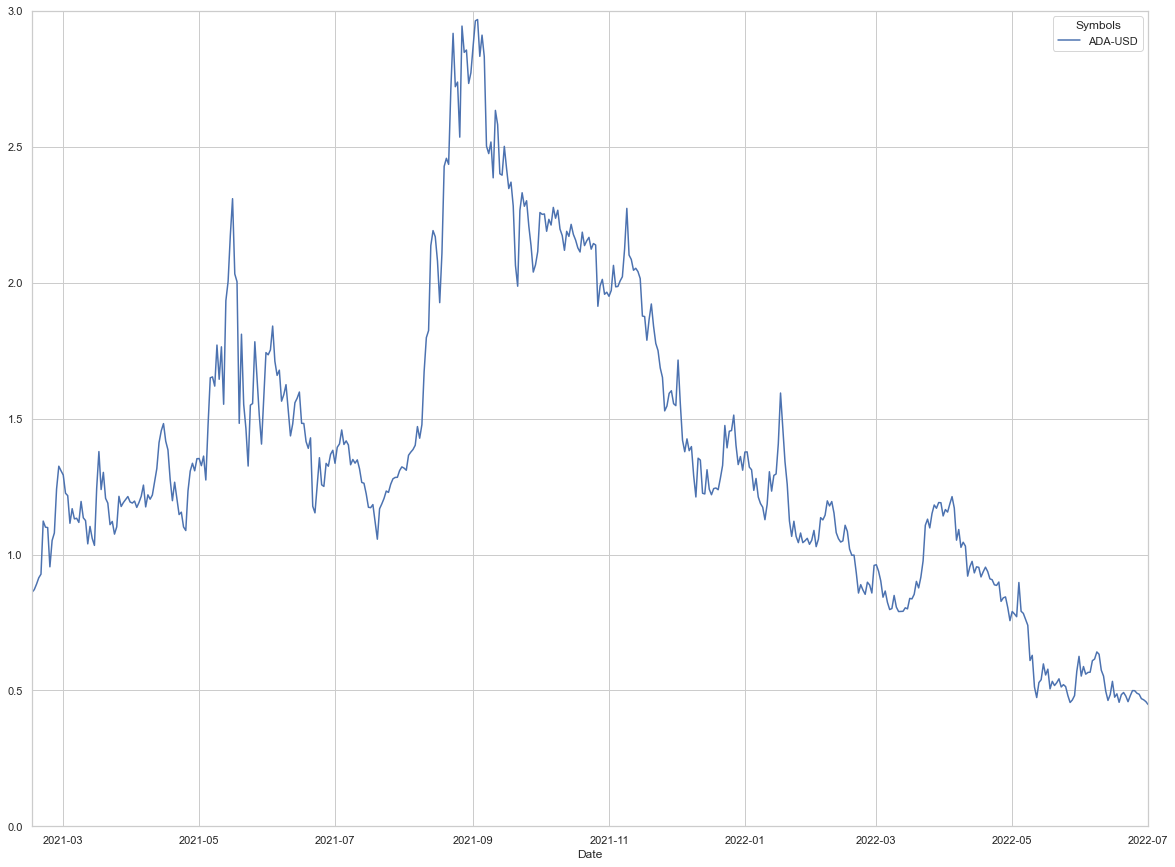

In [275]:
scatter= sns.lineplot(data=df.Close)
scatter.set_xlim(pd.Timestamp('2021-02-15'), pd.Timestamp('2022-07-01'));
scatter.set_ylim(bottom=0, top=3);

In [74]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [156]:
# the following makes 2 graphs that show the volume moved per day vs the price of the coin

In [112]:
fig = px.bar(df.Volume)
fig2 = px.scatter(df.Close)
fig.show()
fig2.show()